In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scienceplots
import os
import seaborn as sns

torch.manual_seed(40)

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [3]:
from src.simulator.prior import get_prior
from src.simulator.simulator import create_simulator
from src.inference.utils import load_model

prior = get_prior()
simulator = create_simulator()
density_estimator = load_model(os.path.join("..", "results", "inference", "trained_model_13.pkl"))

c:\users\julian\documents\cmb-sbi-inference\src\inference\utils.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


In [4]:
from sbi.inference import SNPE_C

inference = SNPE_C(prior=prior)
posterior = inference.build_posterior(density_estimator)
print(posterior)

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [5]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 3.04, 0.9626])
x_observed = simulator(true_parameter)

torch.manual_seed(40)
samples = posterior.set_default_x(x_observed).sample((25000,))

Drawing 25000 posterior samples: 27500it [00:01, 24204.77it/s]                           


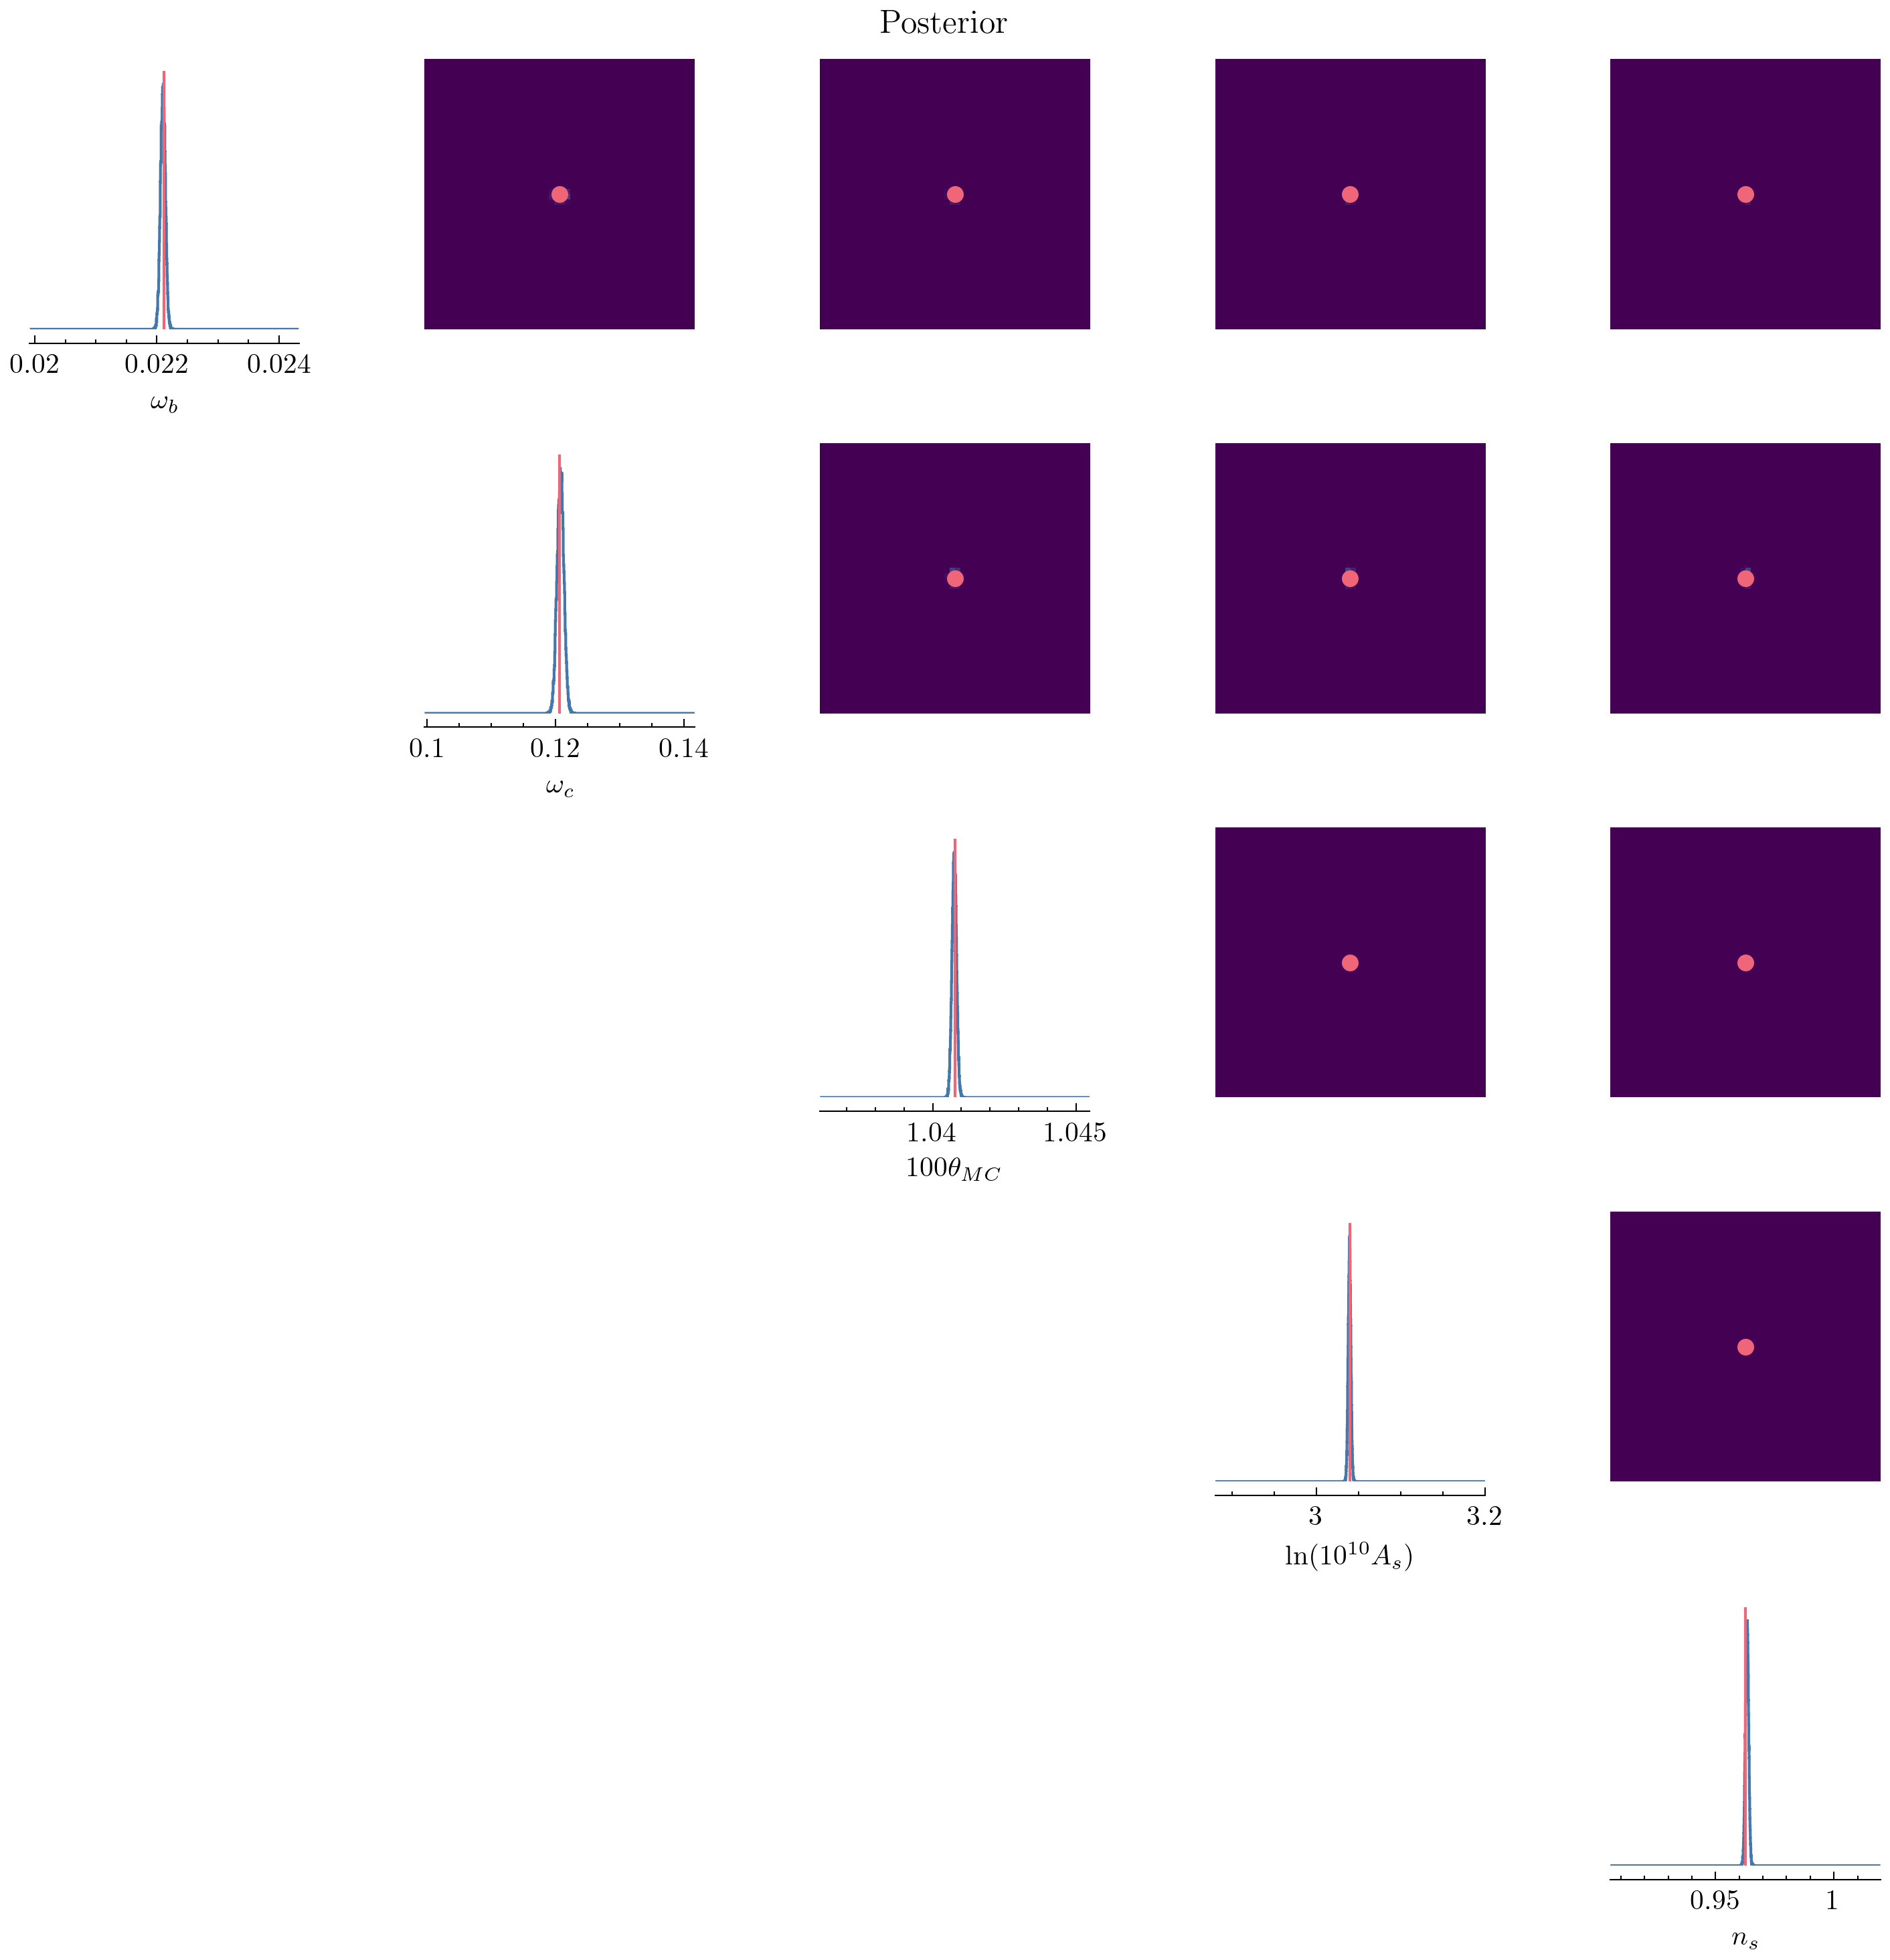

In [5]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.01992, 0.02432],    
    [0.0996, 0.1416],  
    [1.03607, 1.04547],      
    [2.88, 3.2],    
    [0.9056, 1.0196],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

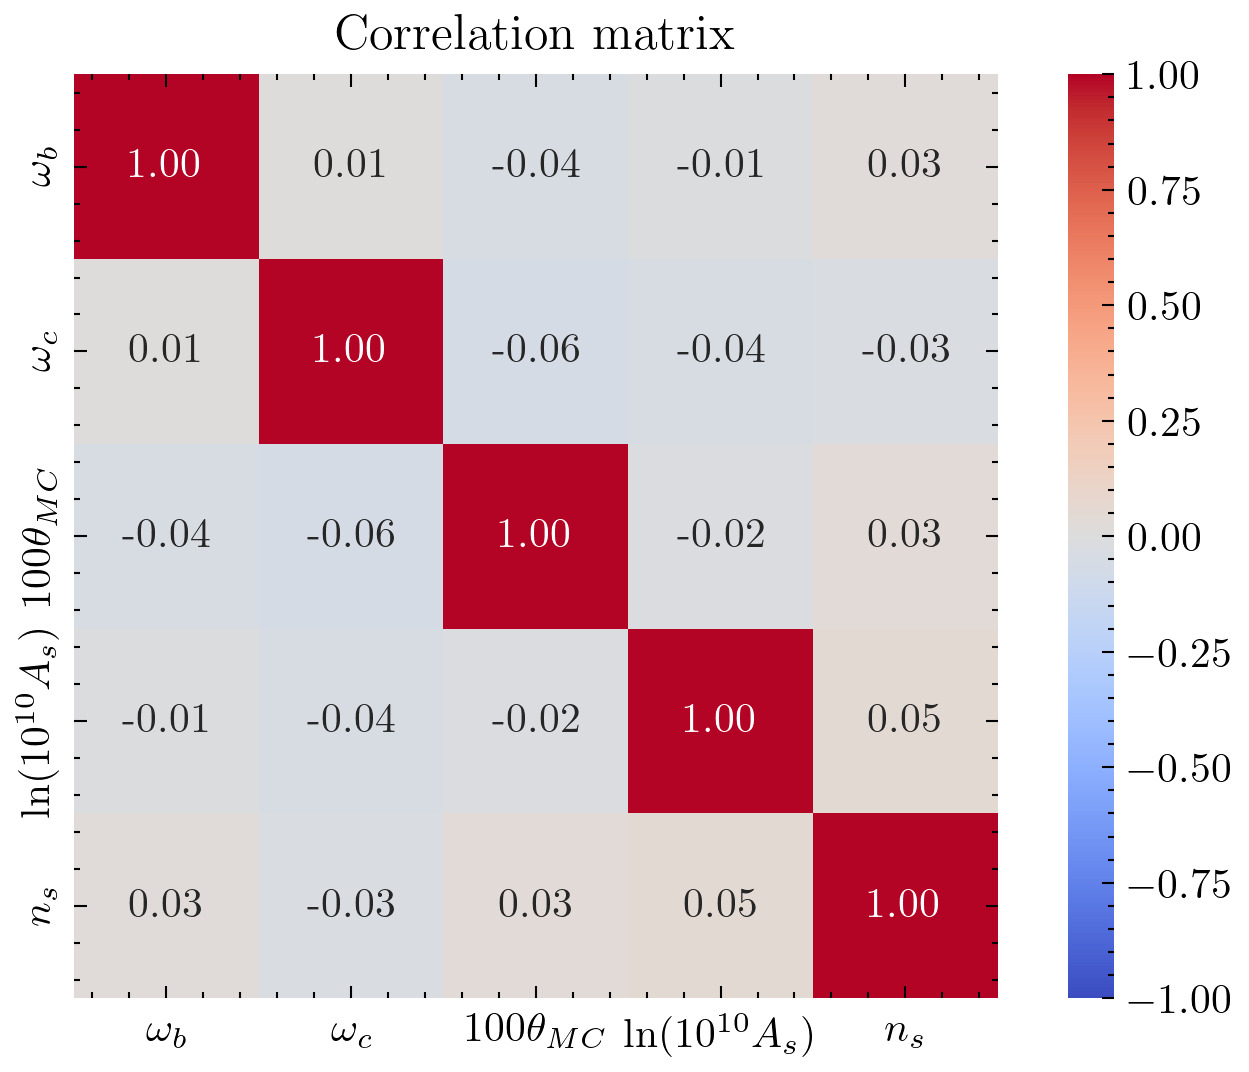

In [6]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

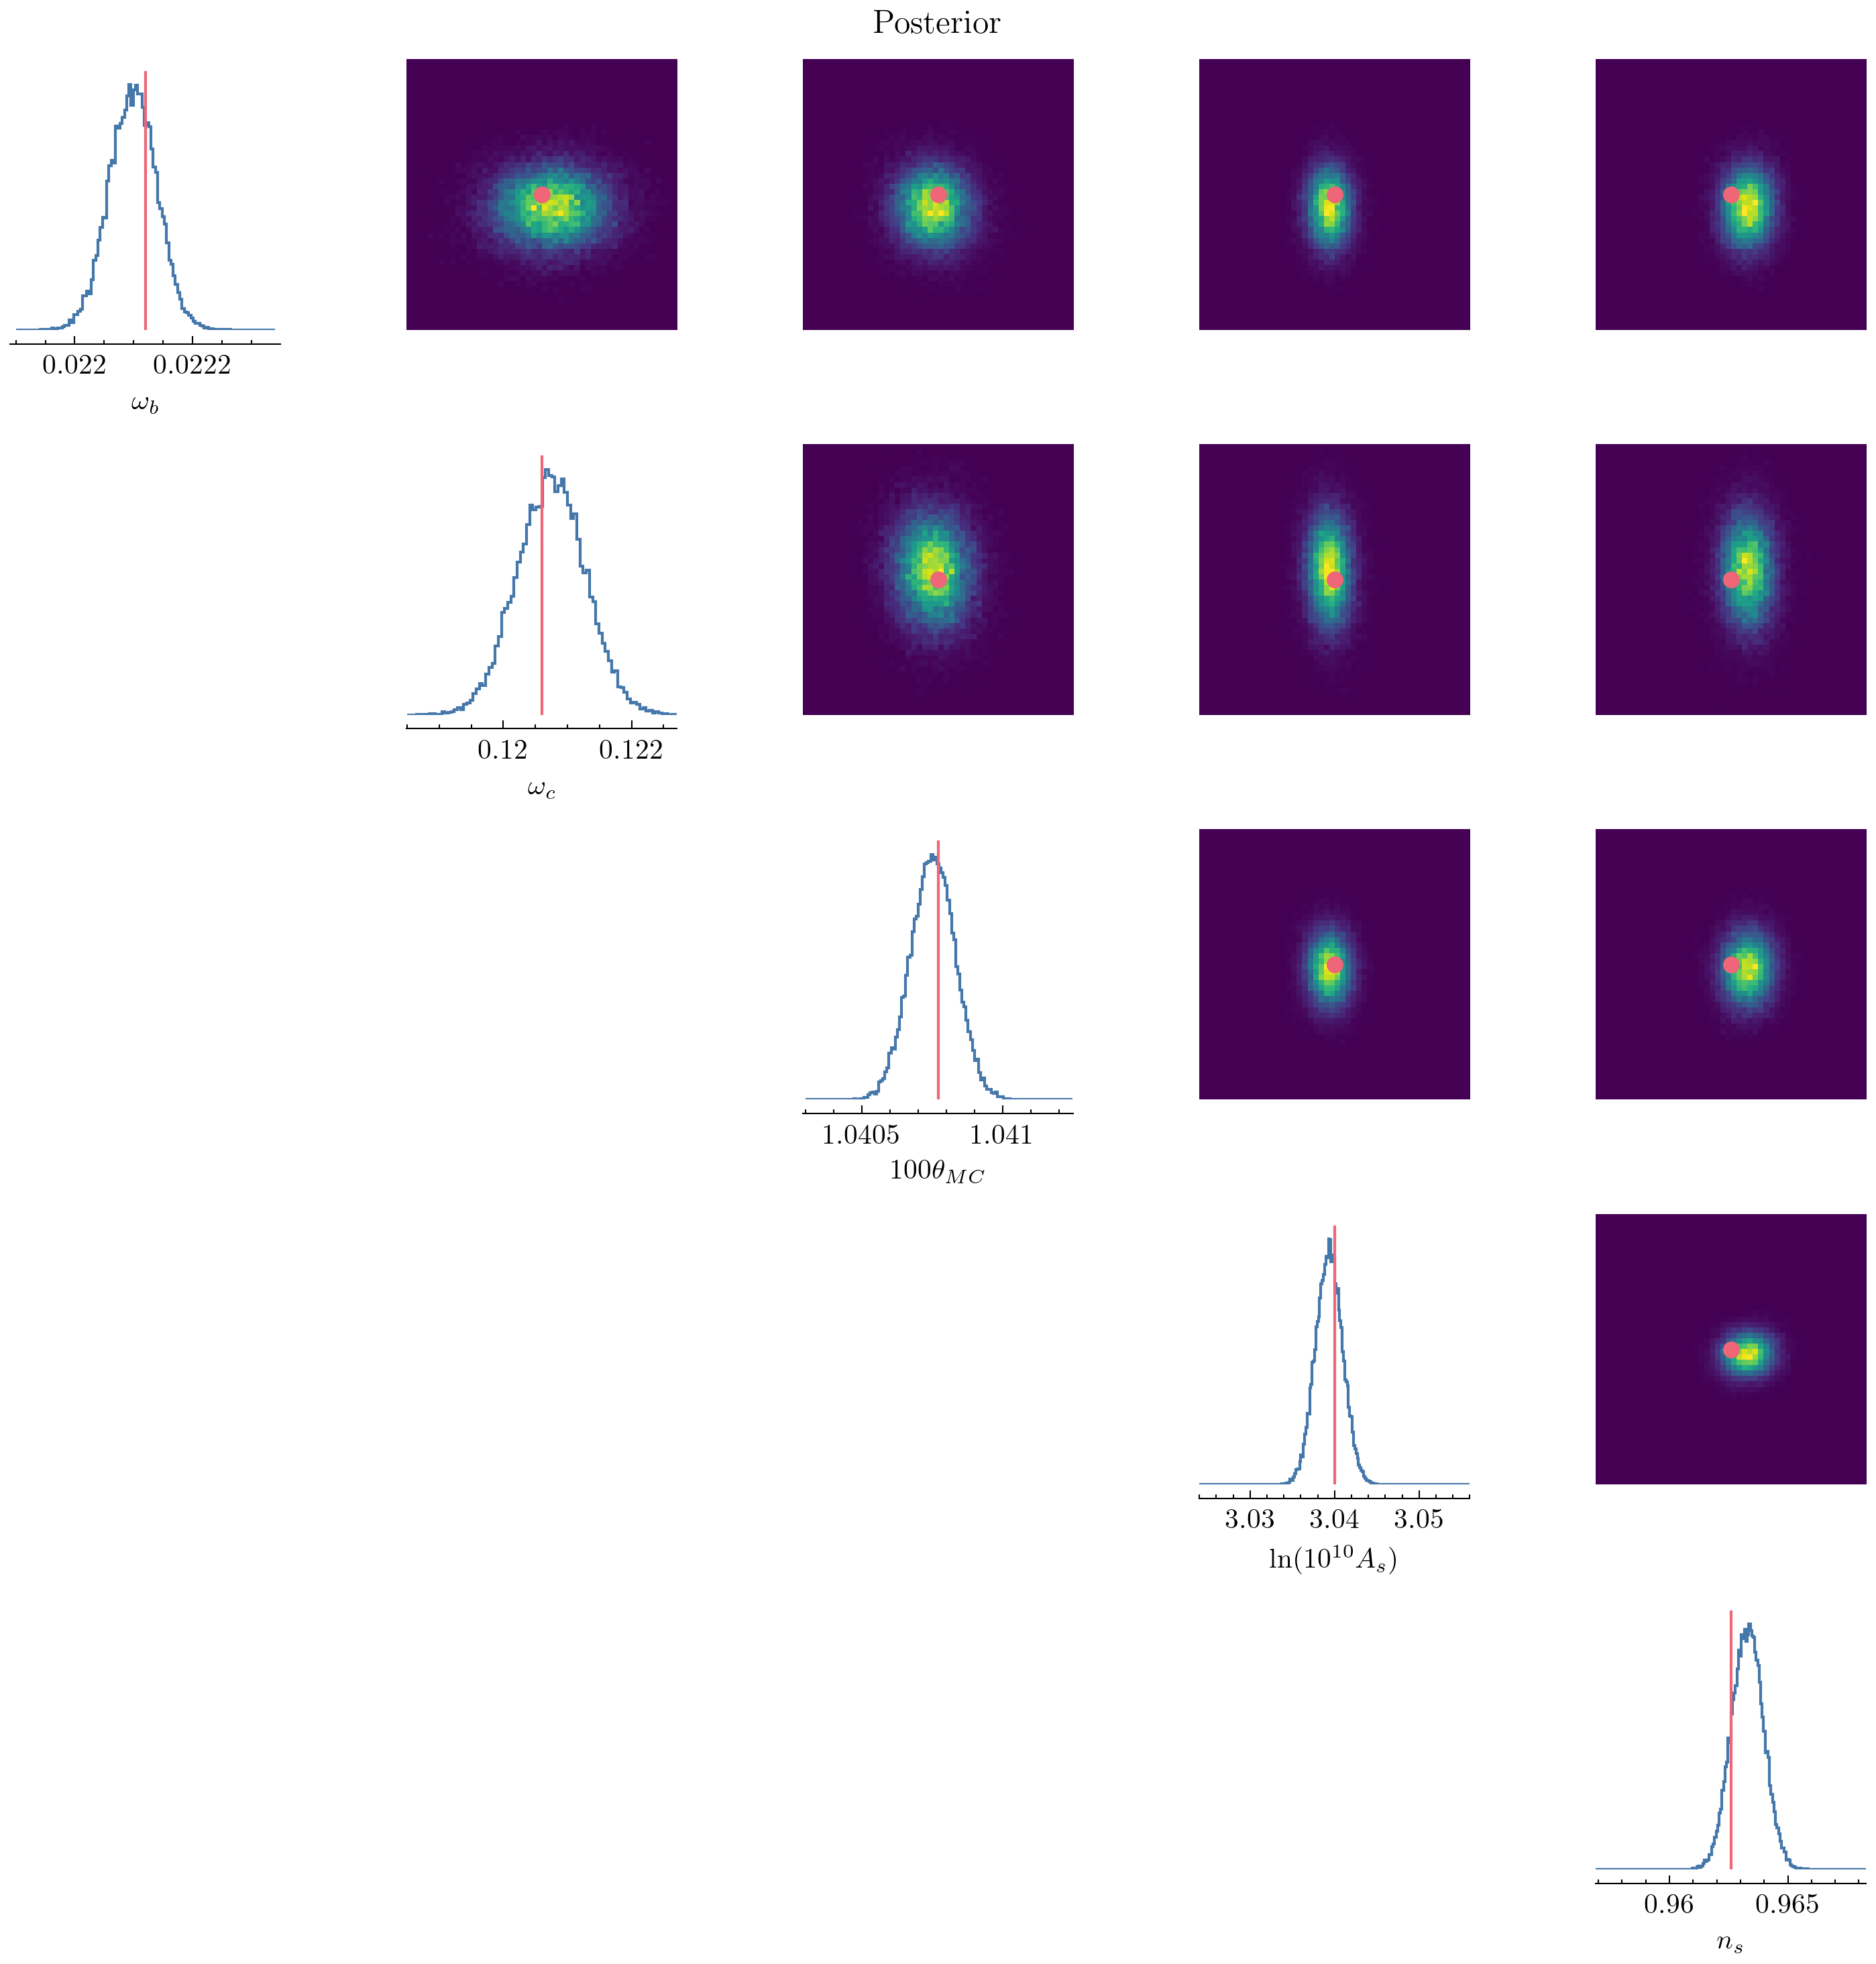

In [7]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.00022, 0.02212+0.00022],    
    [0.1206-0.0021, 0.1206+0.0021],  
    [1.04077-0.00047, 1.04077+0.00047],      
    [3.04-0.016, 3.04+0.016],    
    [0.9626-0.0057, 0.9626+0.0057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

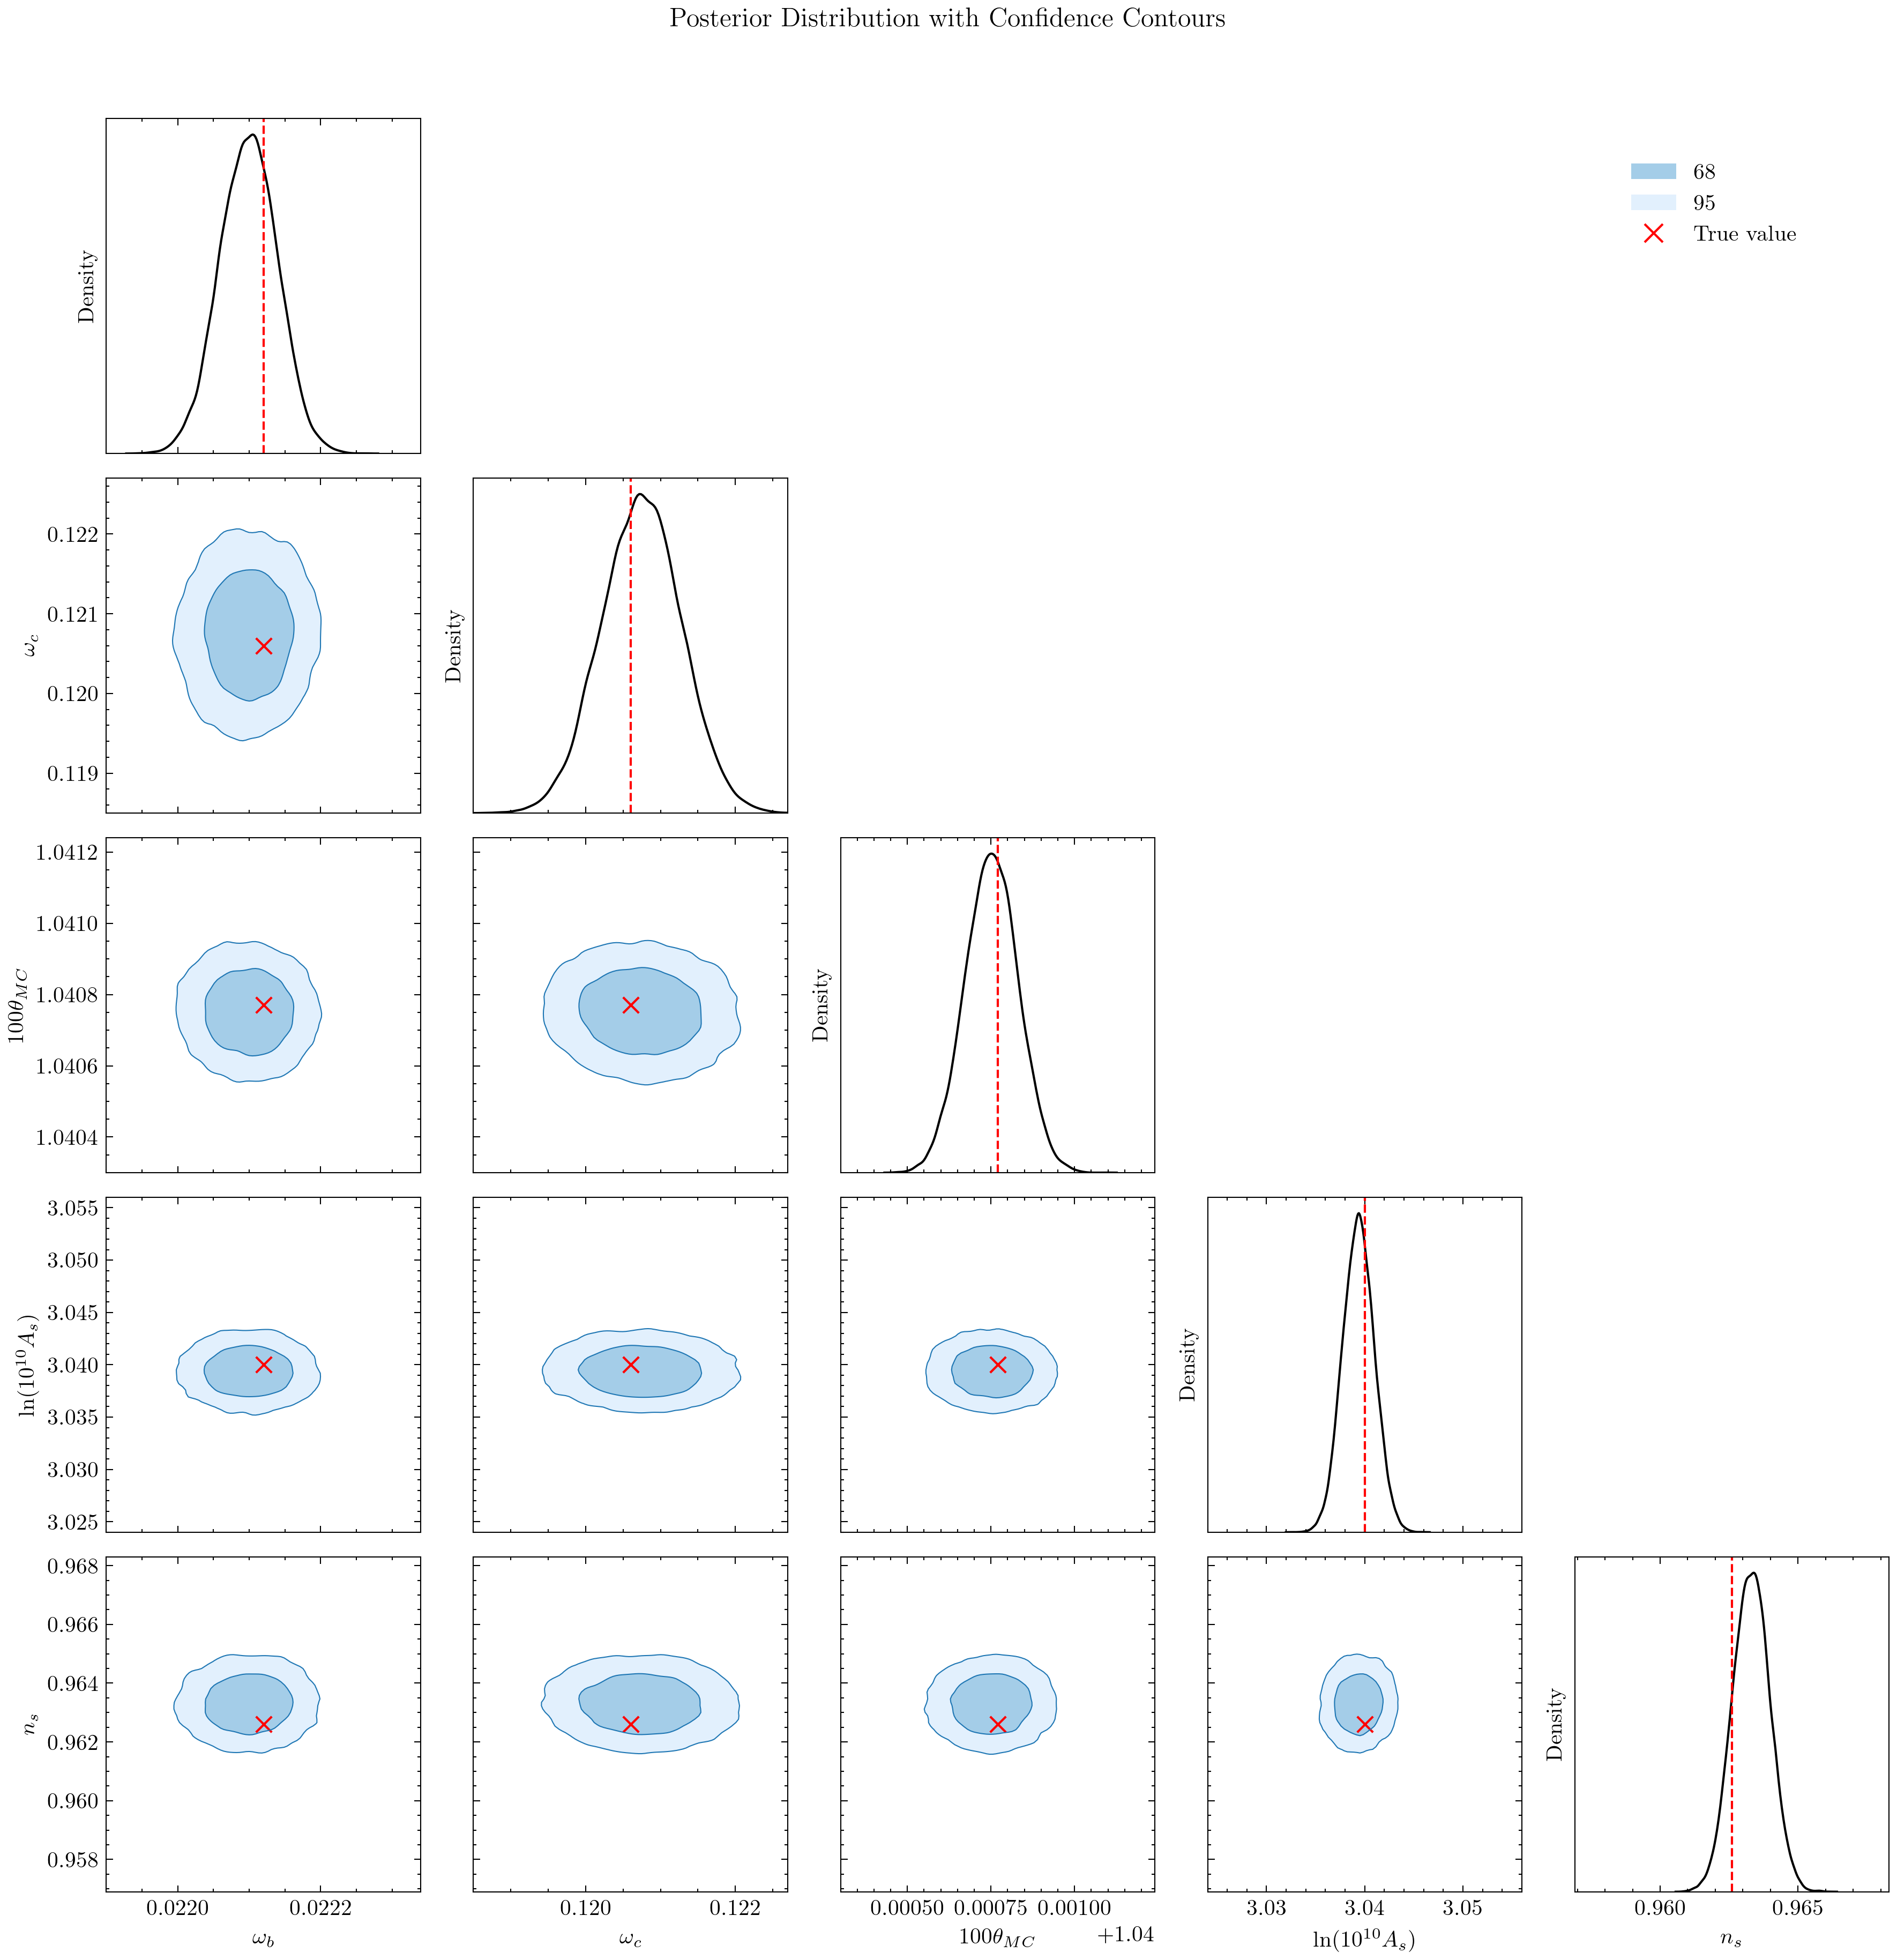

In [16]:
from src.plots.confidence_contours import plot_confidence_contours

fig, axes = plot_confidence_contours(samples, true_parameter, limits, param_names)
plt.show()

In [8]:
from sbi.analysis import ActiveSubspace

sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

print("Valores propios: \n", e_vals, "\n")
print("Vectores propios: \n", e_vecs)

Drawing 1000 posterior samples: 100%|██████████| 1000/1000 [00:00<00:00, 12698.31it/s]

Valores propios: 
 tensor([0.0005, 0.0010, 0.0011, 0.0023, 0.0032]) 

Vectores propios: 
 tensor([[-0.0214,  0.9715, -0.2309, -0.0056,  0.0486],
        [ 0.9985,  0.0099, -0.0448, -0.0122,  0.0281],
        [-0.0424, -0.2339, -0.9698,  0.0169,  0.0517],
        [-0.0255, -0.0360,  0.0620, -0.0531,  0.9957],
        [-0.0114, -0.0076, -0.0178, -0.9984, -0.0527]])
